In [1]:
## el modelo se monta con los datos en listings y lo que queremos predecir es el price

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [3]:
listings = pd.read_csv('data_procesada/listings.csv', index_col=0)
listings.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,4,60,40.45724,-3.67688,2,50,1,78,180
1,9,44,40.40341,-3.74084,2,31,4,33,364
2,0,67,40.38695,-3.69304,0,50,15,0,347
3,3,117,40.42202,-3.70395,0,92,5,10,88
4,3,65,40.41995,-3.69764,0,115,3,68,358


In [4]:
listings.shape

(20156, 9)

In [5]:
listings.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'availability_365'],
      dtype='object')

### Linear regression with multiple features

In [7]:
## Hacemos el split con data to train y test

In [8]:
X = listings[['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'minimum_nights', 'number_of_reviews',
       'availability_365']]
Y = listings[['price']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [10]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.012431814555610154


In [11]:
y_pred = linear_model.predict(x_test)

In [12]:
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.008747972223015488


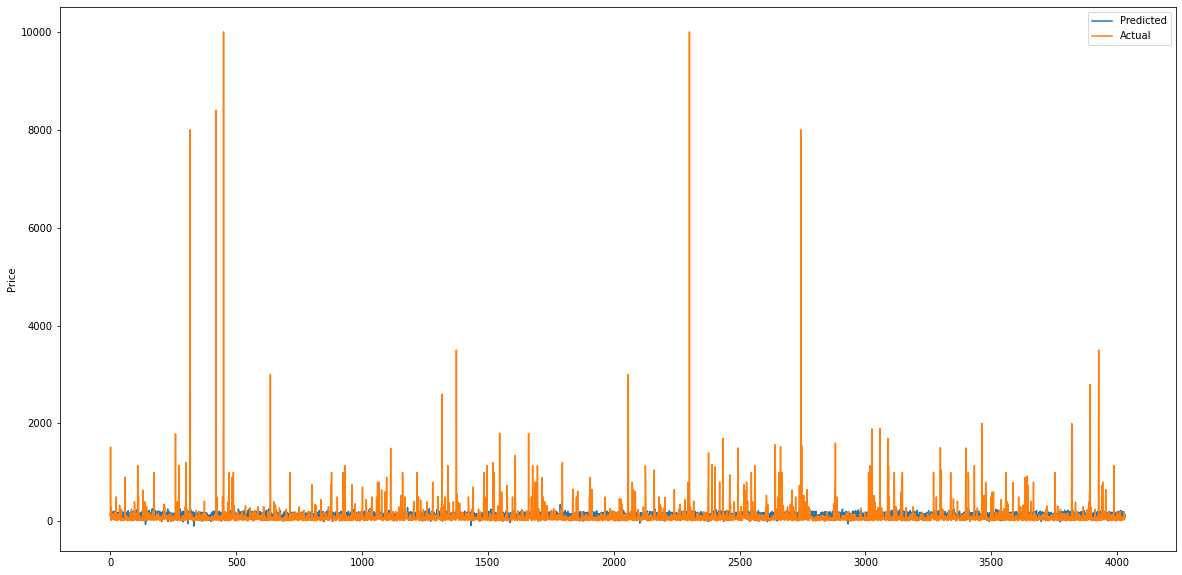

In [14]:
## gráfica con los datos predichos vs actuales
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Price')

plt.legend()
plt.show()

In [15]:
## me dan scores muy bajos, así que igual es mejor quitar los outliers y estandarizar la data

## Estandarizamos la data

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_array = scaler.fit_transform(listings)

In [17]:
scaled_data = pd.DataFrame(scaled_array, columns= listings.columns)

scaled_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,-0.456095,-0.334176,1.606751,0.604162,1.140868,-0.168812,-0.172140,0.739887,0.113556
1,0.524539,-0.795511,-0.783255,-1.643402,1.140868,-0.210430,-0.078197,0.025232,1.367283
2,-1.240602,-0.132341,-1.514065,0.036297,-0.839269,-0.168812,0.266260,-0.498848,1.251449
3,-0.652222,1.309332,0.043013,-0.347082,-0.839269,-0.076815,-0.046883,-0.340036,-0.513308
4,-0.652222,-0.190008,-0.048893,-0.125347,-0.839269,-0.026435,-0.109512,0.581075,1.326400


In [18]:
## volvemos a probar el modelo

In [19]:
X = listings[['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'minimum_nights', 'number_of_reviews',
       'availability_365']]
y = listings[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
linear_model = LinearRegression(normalize=True).fit(X_train, y_train)

In [21]:
print('Training score: ', linear_model.score(X_train, y_train))

Training score:  0.012037386440273745


In [22]:
y_pred = linear_model.predict(X_test)

In [23]:
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.011420568409218013


In [24]:
## TAMPOCO FUNCIONA

## Quito Outliers

In [25]:
max_thresold = listings['price'].quantile(0.95)
max_thresold
## esto significa que cualquier cosa por encima de esto lo podemos considerar outlier

350.0

In [26]:
outliers = listings[listings['price'] > max_thresold]
outliers
## aqui tengo a los outliers

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
9,3,83,40.41980,-3.71078,0,1400,3,0,365
48,3,117,40.42762,-3.70323,0,9999,5,24,42
453,3,50,40.41179,-3.69813,0,510,2,1,83
506,14,68,40.42969,-3.67649,0,364,3,1,362
567,3,117,40.42692,-3.70495,2,400,3,55,0
...,...,...,...,...,...,...,...,...,...
19985,3,114,40.41539,-3.70634,0,618,1,0,364
19990,3,50,40.40968,-3.70533,0,1567,1,0,287
20100,5,102,40.44068,-3.69487,0,1498,1,0,364
20124,3,40,40.41637,-3.69650,0,469,1,0,352


In [27]:
outliers.shape

(992, 9)

In [28]:
## y le decimos al pc que nos quedamos con la data que este por debajo de ese max_thresold

In [29]:
listings_normales = listings[(listings['price'] <= max_thresold)]
listings_normales.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,4,60,40.45724,-3.67688,2,50,1,78,180
1,9,44,40.40341,-3.74084,2,31,4,33,364
2,0,67,40.38695,-3.69304,0,50,15,0,347
3,3,117,40.42202,-3.70395,0,92,5,10,88
4,3,65,40.41995,-3.69764,0,115,3,68,358


In [30]:
listings_normales.shape

(19164, 9)

In [31]:
## outliers quitados , vamos a volver a montar el modelo

### Linear regression with multiple features

In [32]:
X = listings_normales[['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'minimum_nights', 'number_of_reviews',
       'availability_365']]
Y = listings_normales[['price']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [33]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [34]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.16259699044592224


In [35]:
y_pred = linear_model.predict(x_test)

In [36]:
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.16035615143618098


In [38]:
## mejora algo el score pero no mucho